In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from dreamUtils import *
from dreamNetworks import *

Using TensorFlow backend.


DreamNetworks is ready!


In [2]:
channels_coord = 'channelcoords.mat'
locs_3D = sio.loadmat(channels_coord)['locstemp']
locs_2D = map_to_2d(locs_3D)
print(locs_2D.shape)

(256, 2)


In [50]:
# Load raw data 
filename = '10sec_raw_data_zip'
loaded = np.load(filename+'.npz')
rawdata = loaded['data']
label = loaded['labels']

In [51]:
# Load raw data 
filename = 'fft_data_zip'
loaded = np.load(filename+'.npz')
fft_data = loaded['data']
fft_label = loaded['labels']

In [53]:
print(rawdata.shape, label.shape)
print(fft_data.shape, fft_label.shape)

(3, 5000, 256) (3,)
(33, 60, 512) (33,)


In [ ]:
def tt_split(data, labels, ratio=0.8, myseed=1453):
    """split the dataset based on the split ratio. Training data ratio"""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(labels)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = data[index_tr]
    x_te = data[index_te]
    y_tr = labels[index_tr]
    y_te = labels[index_te]
    return x_tr, x_te, y_tr, y_te

In [38]:
def centerize_reference(data):
    electrode_means = data.mean(axis=1, keepdims=True)
    data = data-electrode_means
    #print(data.shape)
    return data

In [55]:
def lab(y, sample_size):
    return [y]*sample_size

In [56]:
x_tr, x_te, y_tr, y_te = tt_split(rawdata, label, ratio=0.8)

In [57]:
x_tr.shape

(2, 5000, 256)

In [61]:
y_train = np.concatenate( [lab(y, 5000) for y in y_tr]  )
y_test = np.concatenate( [lab(y, 5000) for y in y_te]  )

In [62]:
X_train = np.concatenate( [centerize_reference(x) for x in x_tr] , axis=0 )
X_test = np.concatenate( [centerize_reference(x) for x in x_te] , axis=0 )

In [63]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10000, 256) (10000,)
(5000, 256) (5000,)


In [79]:
images = gen_images(locs_2D, X_train[:100], 64)

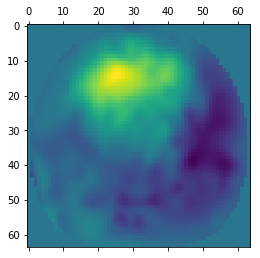

In [80]:
plt.matshow(images[0].reshape(64,-1))

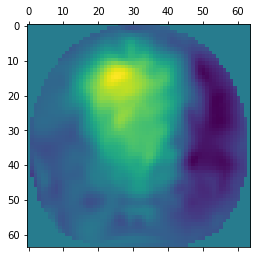

In [85]:
plt.matshow(images[3].reshape(64,-1))

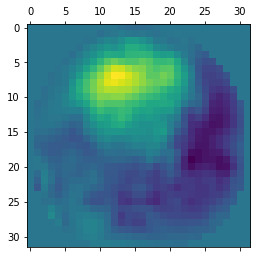

In [78]:
plt.matshow(images[0].reshape(32,32))

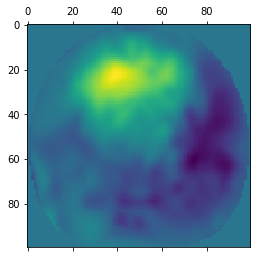

In [76]:
plt.matshow(images[0].reshape(100,100))

In [72]:
images[0][0][18]

array([ 0.        , -0.58228361, -1.4405038 , -1.86326519, -1.82646192,
       -1.38904116, -1.08452747, -1.52308449, -2.10375925, -1.88768239,
       -0.97458006, -0.40554785, -0.50786422, -0.64643417, -0.38070966,
       -0.29555924, -0.15198572,  0.72884126,  0.37266844, -0.50476581,
       -0.45529324, -2.07299261, -4.4665384 , -6.46978872, -6.74516958,
       -6.39321005, -5.99567166, -5.84319261, -4.67141845, -2.95683233,
       -1.92241971,  0.        ])

In [ ]:
model = 

## LSTM Implement